In [3]:
!pip install opencv-python

In [1]:
import torch
import torchvision.transforms as transforms
import cv2
import matplotlib.pyplot as plt

from network.Transformer import Transformer

In [2]:
model = Transformer()
model.load_state_dict(torch.load('pretrained_model/Shinkai_net_G_float.pth'))
model.eval()
print('Model Loaded!')

Model Loaded!


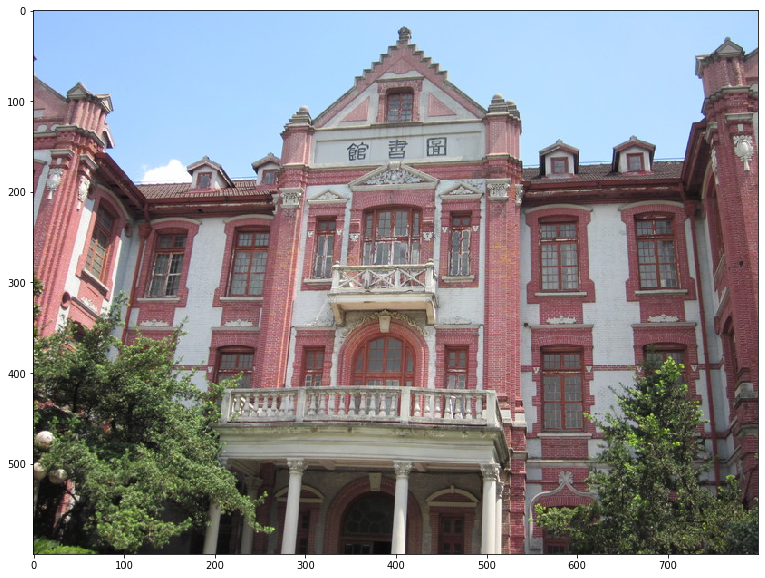

In [5]:
img_size = 450
img_path = 'test_img/sjtu.jpg'

img = cv2.imread(img_path)

T = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize(img_size, 2),
    transforms.ToTensor()
])

img_input = T(img).unsqueeze(0)

img_input = -1 + 2 * img_input # 0 - 1 -> -1 - +1

plt.figure(figsize=(16,10))
plt.imshow(img[:,:,::-1])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


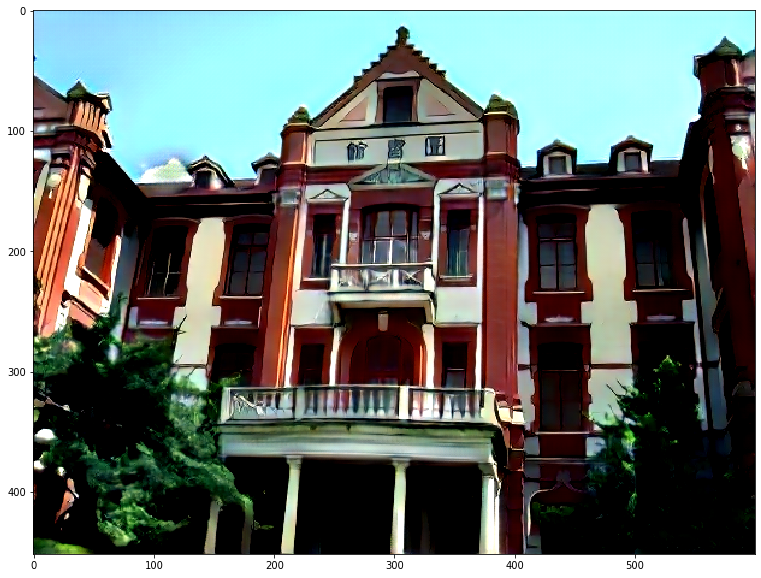

In [6]:
img_output = model(img_input)

img_output = img_output.squeeze().detach().numpy() +1. / 2.
img_output = img_output.transpose([1, 2, 0])

plt.figure(figsize=(16,10))
plt.imshow(img_output[:,:,::-1])